### MS-COCO 데이터 기반으로 Faster RCNN Pretrained 모델을 활용하여 Inference 수행
* Faster RCNN Pretrained 모델 다운로드
* Faster RCNN용 Config 파일 설정.  
* Inference 용 모델을 생성하고, Inference 적용

In [1]:
# pretrained weight 모델을 다운로드 받기 위해서 mmdetection/checkpoints 디렉토리를 만듬.
!cd mmdetection; mkdir checkpoints

mkdir: cannot create directory ‘checkpoints’: File exists


In [2]:
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2025-12-21 02:23:53--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.22.201, 47.246.22.194, 47.246.22.196, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.22.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  31.6MB/s    in 5.0s    

2025-12-21 02:23:58 (32.1 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [3]:
!ls -lia /content/mmdetection/checkpoints

total 262080
3230670250 drwxr-xr-x 2 root root        63 Dec 21 01:47 .
 541614022 drwxrwxrwx 1 root root        50 Dec 21 01:47 ..
3230670251 -rw-r--r-- 1 root root 167287506 Nov  2  2021 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [4]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정.
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [5]:
# config 파일과 pretrained 모델을 기반으로 Detector 모델을 생성.
from mmdet.apis import init_detector, inference_detector

model = init_detector(config_file, checkpoint_file, device='cuda:0')

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.9/site-packages/torch/utils/cpp_extension.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
/opt/conda/lib/python3.9/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/comp

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [6]:
# mmdetection은 상대 경로를 인자로 주면 무조건 mmdetection 디렉토리를 기준으로 함.
%cd mmdetection

from mmdet.apis import init_detector, inference_detector

# init_detector() 인자로 config와 checkpoint를 입력함.
model = init_detector(config='configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py', checkpoint='checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth')

/content/mmdetection
load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [7]:
%cd /content

/content


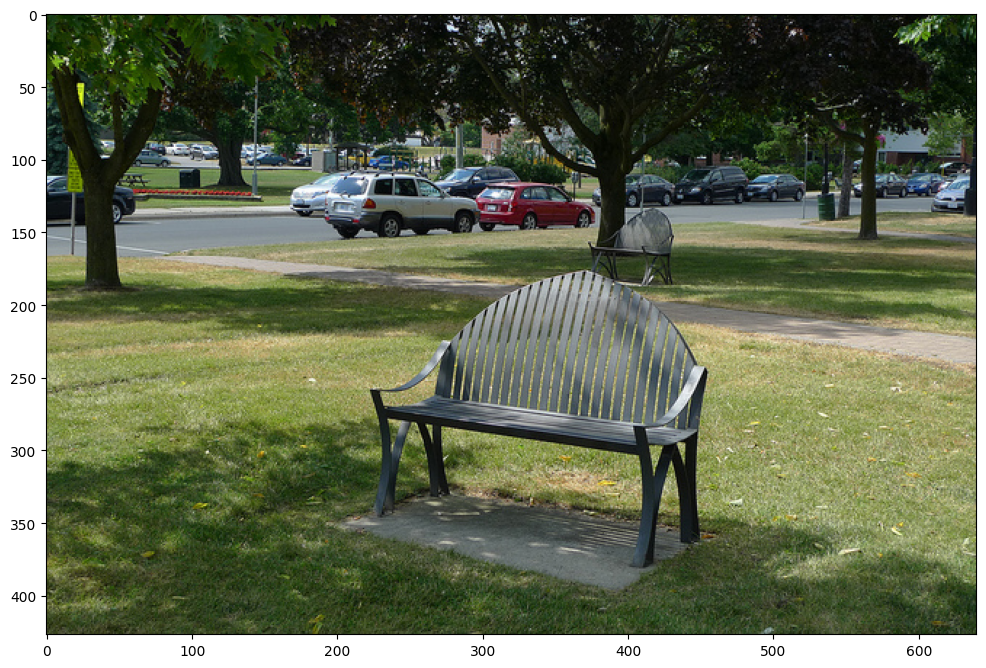

In [8]:
import cv2
import matplotlib.pyplot as plt
img = '/content/mmdetection/demo/demo.jpg'

img_arr  = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr)

In [9]:
img = '/content/mmdetection/demo/demo.jpg'
# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음.
results = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


In [10]:
type(results), len(results)

(list, 80)

In [11]:
# results는 list형으로 coco class의  0부터 79까지 class_id별로 80개의 array를 가짐.
# 개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐. 개별 class별로 여러개의 좌표를 가지면 여러개의 array가 생성됨.
# 좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준.
# 개별 array의 shape는 (Detection된 object들의 수, 5(좌표와 confidence)) 임

results

[array([[3.75348694e+02, 1.19171089e+02, 3.81950989e+02, 1.34459839e+02,
         1.35267109e-01],
        [5.32362366e+02, 1.09556564e+02, 5.40526062e+02, 1.25223190e+02,
         8.86036083e-02],
        [3.61123657e+02, 1.09048805e+02, 3.68625153e+02, 1.22484146e+02,
         7.19889328e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.09650330e+02, 1.13806122e+02, 6.34511536e+02, 1.36952820e+02,
         9.88769174e-01],
        [4.81772980e+02, 1.10480659e+02, 5.22459656e+02, 1.30406448e+02,
         9.87170398e-01],
        [1.01750851e+00, 1.12144012e+02, 6.04300041e+01, 1.44174026e+02,
         9.83240306e-01],
        [2.94625977e+02, 1.17036591e+02, 3.78022827e+02, 1.50550415e+02,
         9.71307278e-01],
        [3.96327606e+02, 1.11203613e+02, 4.32490662e+02, 1.32728683e+02,
         9.67822015e-01],
        [5.90978455e+02, 1.10802704e+02, 6.15401978e+02, 1.26493423e+02,
         9.59427893e-01],
        [2.67581543e+02, 1.05685349e+02, 3.28817413

In [12]:
results[0].shape, results[1].shape, results[2].shape, results[3].shape

((3, 5), (0, 5), (46, 5), (0, 5))

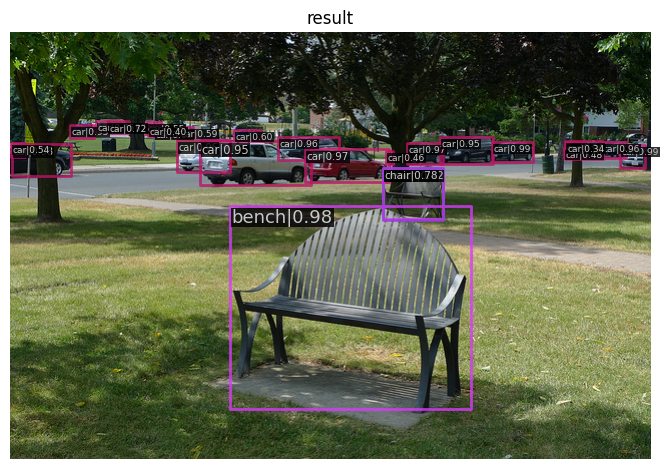

In [13]:
from mmdet.apis import show_result_pyplot
# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bbox 처리된 image)
# Default로 score threshold가 0.3 이상인 Object들만 시각화 적용. show_result_pyplot은 model.show_result()를 호출.
show_result_pyplot(model, img, results)

### Model의 Config 설정 확인하기

In [14]:
model.__dict__

{'training': False,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([('backbone',
               ResNet(
                 (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                 (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                 (relu): ReLU(inplace=True)
                 (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                 (layer1): ResLayer(
                   (0): Bottleneck(
                     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                     (bn1): Bat

In [15]:
#print(model.cfg)
print(model.cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=None),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.

### array를 inference_detector()에 입력할 경우에는 원본 array를 BGR 형태로 입력 필요(RGB 변환은 내부에서 수행하므로 BGR로 입력 필요)

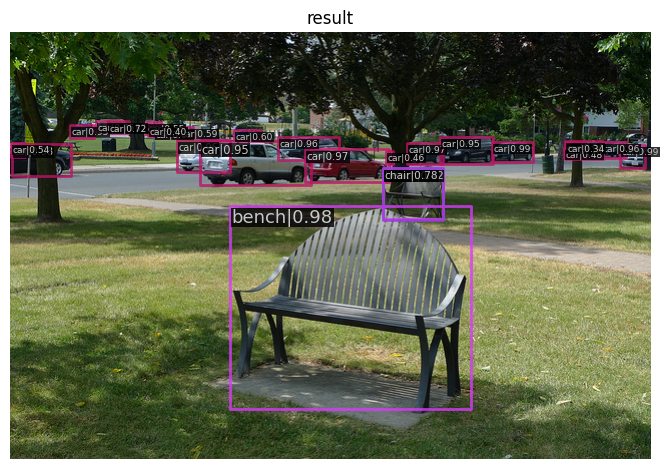

In [16]:
import cv2

# RGB가 아닌 BGR로 입력
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
results = inference_detector(model, img_arr)

show_result_pyplot(model, img_arr, results)

### show_result_pyplot()을 이용하지 않고, inference 결과를 image로 표현하기
* model과 image array를 입력하면 해당 image를 detect하고 bbox 처리해주는 get_detected_img() 함수 생성.
* COCO 클래스 매핑은 0 부터 순차적으로 적용됨.
* results에 들어있는 array 값이 없는 경우는 해당 list의 index에 해당하는 class id값으로 object가 Detection되지 않은 것임.  
* 개별 class의 score threshold가 낮은 값은 제외.

In [17]:
# 0부터 순차적으로 클래스 매핑된 label 적용.
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [18]:
import numpy as np

# np.where 사용법 예시.
arr1 = np.array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454759e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88786465e-01],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20717013e-02]], dtype=np.float32)
print(arr1.shape)

arr1_filtered = arr1[np.where(arr1[:, 4] > 0.1)]
print('### arr1_filtered:', arr1_filtered, arr1_filtered.shape)

(3, 5)
### arr1_filtered: [[3.75348572e+02 1.19171005e+02 3.81950867e+02 1.34460617e+02
  1.35454759e-01]
 [5.32362000e+02 1.09554726e+02 5.40526550e+02 1.25222633e+02
  8.88786495e-01]] (2, 5)


In [19]:
np.where(arr1[:, 4] > 0.1)

(array([0, 1]),)

In [20]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성.
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사.
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음.
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list.
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐.
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행.
    if len(result) == 0:
      continue

    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외.
    result_filtered = result[np.where(result[:, 4] > score_threshold)]

    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출.
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출.
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

car: 0.9888
car: 0.9872
car: 0.9832
car: 0.9713
car: 0.9678
car: 0.9594
car: 0.9593
car: 0.9569
car: 0.9510
car: 0.9459
car: 0.9440
car: 0.9331
car: 0.8665
car: 0.8267
car: 0.7534
car: 0.7163
car: 0.6012
car: 0.5917
car: 0.5541
car: 0.5434
car: 0.4760
car: 0.4616
car: 0.4008
car: 0.3432
bench: 0.9778
bench: 0.4166
chair: 0.7780


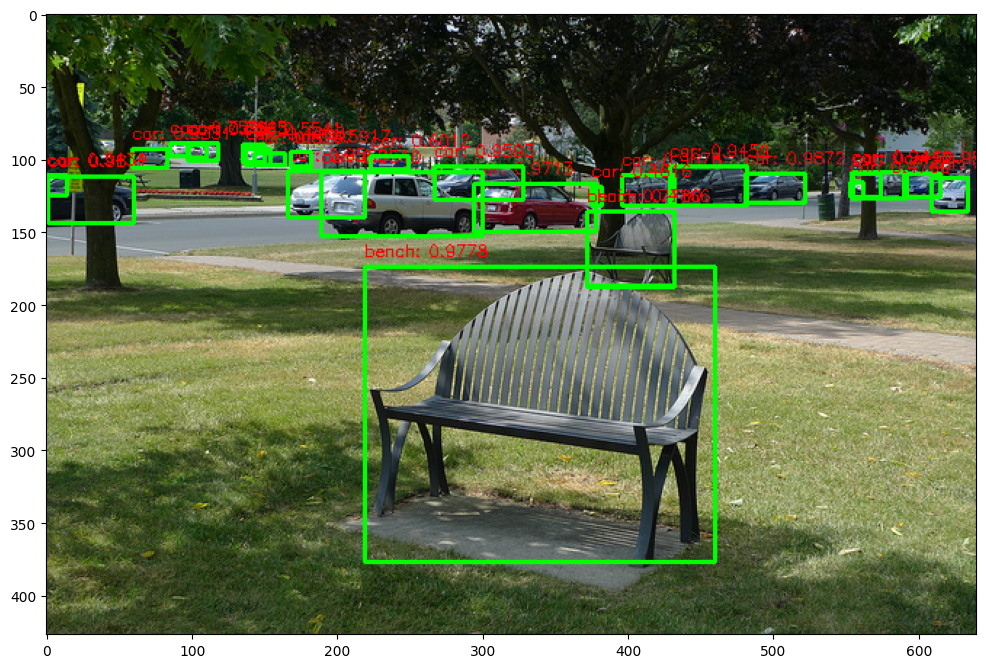

In [21]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

In [22]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [23]:
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!ls -lia /content/data/beatles01.jpg

--2025-12-21 02:24:21--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.002s  

2025-12-21 02:24:21 (189 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

13433821427 -rw-r--r-- 1 root root 383118 Dec 21 02:24 /content/data/beatles01.jpg


person: 0.9988
person: 0.9982
person: 0.9980
person: 0.9971
person: 0.9605
car: 0.9693
car: 0.9686
car: 0.9649
car: 0.9518
car: 0.9253
car: 0.9029
car: 0.8316
car: 0.8011
car: 0.7329
car: 0.6213
tie: 0.5924


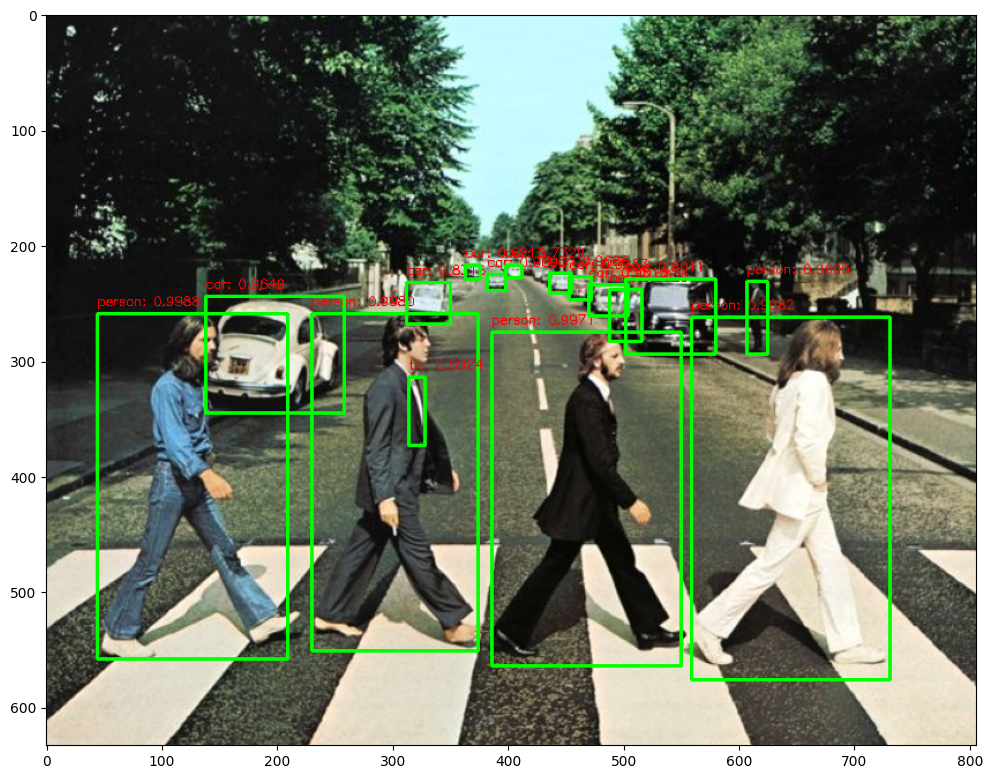

In [24]:
img_arr = cv2.imread('/content/data/beatles01.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.5, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

### Video Inference 수행
* mmdetection의 video_demo.py 대로 Video inference 수행시 image 처리 시간이 상대적으로 오래 걸림.
* 이미지 처리 로직을 변경하여 적용

In [25]:
!wget -O /content/data/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2025-12-21 02:24:23--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/John_Wick_small.mp4 [following]
--2025-12-21 02:24:23--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/John_Wick_small.mp4 [following]
--2025-12-21 02:24:24--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.

In [26]:
from mmdet.apis import init_detector, inference_detector
import mmcv

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [27]:
# https://github.com/open-mmlab/mmdetection/blob/master/demo/video_demo.py 대로 video detection 수행.

import cv2

video_reader = mmcv.VideoReader('/content/data/John_Wick_small.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/data/John_Wick_small_out1.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame)
  frame = model.show_result(frame, result, score_thr=0.4)

  video_writer.write(frame)

if video_writer:
        video_writer.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 3.3 task/s, elapsed: 17s, ETA:     0s


### Custom된 frame처리 로직을 적용하여 Video Inference 수행.
* 기존에 사용한 get_detected_img()를 그대로 사용함.

In [28]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성.
import numpy as np

# 0부터 순차적으로 클래스 매핑된 label 적용.
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사.
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음.
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list.
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐.
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행.
    if len(result) == 0:
      continue

    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외.
    result_filtered = result[np.where(result[:, 4] > score_threshold)]

    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출.
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출.
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

In [29]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)
    btime = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold, is_print=False)
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [30]:
do_detected_video(model, '/content/data/John_Wick_small.mp4', '/content/data/John_Wick_small_out2.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 58
frame별 detection 수행 시간: 0.1054


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


frame별 detection 수행 시간: 0.1415
frame별 detection 수행 시간: 0.3942
frame별 detection 수행 시간: 0.1832
frame별 detection 수행 시간: 0.1194
frame별 detection 수행 시간: 0.2383
frame별 detection 수행 시간: 0.2064
frame별 detection 수행 시간: 0.1111
frame별 detection 수행 시간: 0.1365
frame별 detection 수행 시간: 0.2851
frame별 detection 수행 시간: 0.195
frame별 detection 수행 시간: 0.1026
frame별 detection 수행 시간: 0.1471
frame별 detection 수행 시간: 0.1687
frame별 detection 수행 시간: 0.5584
frame별 detection 수행 시간: 0.1205
frame별 detection 수행 시간: 0.1168
frame별 detection 수행 시간: 0.0518
frame별 detection 수행 시간: 0.1214
frame별 detection 수행 시간: 0.4713
frame별 detection 수행 시간: 0.1335
frame별 detection 수행 시간: 0.1138
frame별 detection 수행 시간: 0.133
frame별 detection 수행 시간: 0.3963
frame별 detection 수행 시간: 0.1655
frame별 detection 수행 시간: 0.122
frame별 detection 수행 시간: 0.121
frame별 detection 수행 시간: 0.4641
frame별 detection 수행 시간: 0.1309
frame별 detection 수행 시간: 0.1117
frame별 detection 수행 시간: 0.1387
frame별 detection 수행 시간: 0.3061
frame별 detection 수행 시간: 0.1383
frame별 detec